# Simple Transfer Functions

[Examples from MLNotebook](https://mlnotebook.github.io/post/transfer-functions/)

In [21]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-9., 7., .1)
y = np.linspace(0, len(x), len(x))

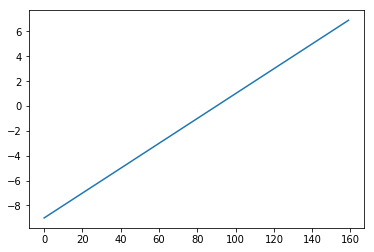

In [22]:
def linear(x, Derivative=False):
    """
    Linear identity f(Xi) = Xi used when we want a node to give output
    without applying any thresholds. Commonly used in final output layer nodes.
    
    Not used in hidden layers, else output will be only a separable solution.
    """
    if not Derivative:
        return x
    else:
        return 1.0

plt.plot(linear(x))

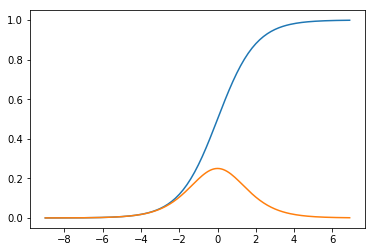

In [23]:
def sigmoid(x, Derivative=False):
    """
    sigmoid maps the input to a value between 0 and 1 but not equal to 0 or 1.
    It means output will be high signal if positive and low signal if negative.
    Simoid's natural threshold is o.5, so any input above will be hig or 1 in binary.
    """
    if not Derivative:
        return 1 / (1 + np.exp (-x))
    else:
        out = sigmoid(x)
        return out * (1 - out)


plt.plot(x,sigmoid(x))
plt.plot(x,sigmoid(x, True))

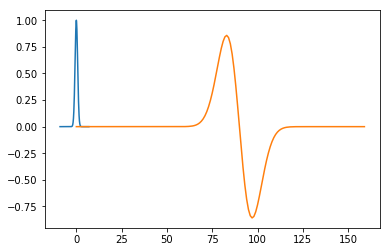

In [24]:
def gauss(x, Derivative=False):
    """
    gauss is an even function, gives the same output for positive or negative values.
    Gives maximum value when no input, commonly used when the input peature
    is less likely to contribute to final result.
    """
    if not Derivative:
        return np.exp(-x**2)
    else:
        return -2 * x * np.exp(-x**2)

plt.plot(x, gauss(x))
plt.plot(gauss(x, True))

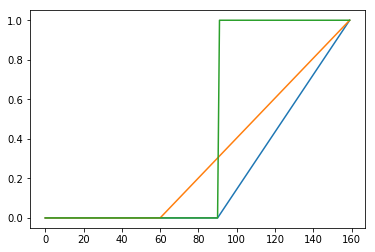

In [25]:
def ramp(x, Derivative=False, T1=0, T2=np.max(x)):
    """
    ramp truncated version of linear function,
    maps a range of inputs to outputs over range 0 1
    but with definitive cut points T1 and T2, this gives
    the ability to fire the node very above a threshold,
    but still have some uncertainity in lower regions.
    """
    out = np.ones(x.shape)
    ids = ((x < T1) | (x > T2))
    if not Derivative:
        out = ((x - T1)/(T2-T1))
        out[(x < T1)] = 0
        out[(x > T2)] = 1
        return out
    else:
        out[ids]=0
        return out

plt.plot(ramp(x))
plt.plot(ramp(x, False, -3))
plt.plot(ramp(x, True))

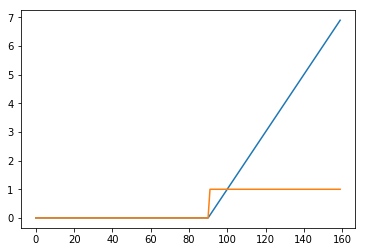

In [26]:
def relu(x, Derivative=False):
    """
    relu is a popular special case of ramp called Rectifying Linear Unit.
    in relu T1 = 0 and T2 is the maximum of the input given a linear function
    with no negative values.
    """
    if not Derivative:
        return np.maximum(0,x)
    else:
        out = np.ones(x.shape)
        out[(x < 0)] = 0
        return out

plt.plot(relu(x))
plt.plot(relu(x, True))